<a href="https://colab.research.google.com/github/davidrtorres/ML_Image_Processing/blob/main/Image_Segmentation_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using K-Means to Segment an Image
K-means is an unsupervised machine learning technique which means we are not going to give the machine learning algorithm labeled data.  There are 2 types of segmentation techniques.  Supervised segmentation where you are providing data and labels and inputting this into the algorithm so it learns the training data and then predicts future unknown data based on what it leared in the training. Unsupervised segmentation is where we input the data and all we tell the algorithm is how many cluster to divide the data into.  It's learning while it looks at the data itself.  There is no training process. 

K-means is a clustering algorithm and it is used when you want to sort the data/images into various clusters.  An image is a bunch of pixel values with dimensions.  We can cluster the pixel values into various segments or clusters.   We are going to let the algorithm figure out how to sort the data into n number of clusters.  We need to tell the algorithm how many clusters we want the data divided into. 'k' stands for the number of clusters.<br>
The means in k-means refers to the averaging of data to find the centroid that defines the clusters.<br>
k-means isn't taking into account the texture of individual regions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from sklearn.cluster import KMeans

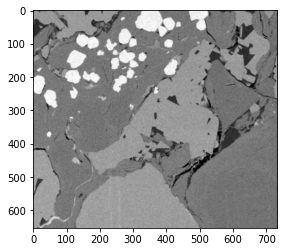

In [3]:
img = io.imread('/content/drive/MyDrive/datasets/BSE.tif', as_gray=False)
plt.imshow(img, cmap='gray');

In [4]:
img2 = img.reshape((-1,3))

'k-means++' is how to initialize the 1st centroid. 

(479302,)


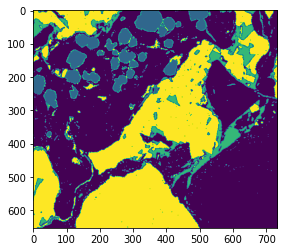

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter= 300, n_init=10, random_state=42)
model = kmeans.fit(img2)
#make a prediction on the image itself
predicted_values = kmeans.predict(img2)
print(predicted_values.shape)
#res = center[label.flatten()]
#need to recast to its orignial shape
segm_image = predicted_values.reshape((img.shape[0], img.shape[1])) #y, x
plt.imshow(segm_image)

In [6]:
segm_image.shape

(653, 734)

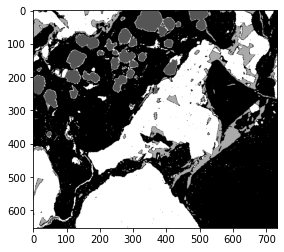

In [7]:
plt.imshow(segm_image, cmap='gray')

#### Image Segmentation and k-means Using CV2Open
There appear to be 4 clear regions that can be isolated.  We'll try to segment the data into 4 different clusters.

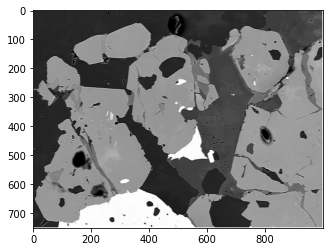

In [8]:
#read the image
img1 = plt.imread('/content/drive/MyDrive/datasets/BSE_Image.jpg')
plt.imshow(img1)

In [9]:
#img2 = cv2.imread('/content/drive/MyDrive/datasets/BSE_Image.jpg')
img2 = cv2.imread('/content/drive/MyDrive/datasets/test_images_air_bike_car/car/test_2.jpg')
#3 represents 3 channels. It looks gray but it is an GBR image
img2.shape

(200, 300, 3)

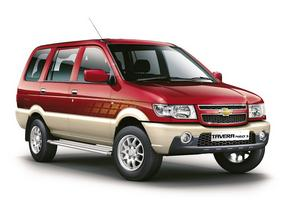

In [10]:
cv2_imshow(img2)

In [11]:
#need to reshape image. Reshaped image into a different size array.
img3 = img2.reshape((-1,3))
img3.shape

(60000, 3)

In [12]:
#should be np.float32 type
img3.dtype

dtype('uint8')

In [13]:
#need to change image to float32
img3 = np.float32(img3)

In [14]:
img3.dtype

dtype('float32')

Define the criteria.  When certain iterations are reach which in this case is 10 and ceertain epsilons are reached which is 1.0.  The algorithm is going to output 3 things: 1) compactness which is the sum of squared of distance from each point to their corresponding centers.  Tells you what the compactness is for that clusters. 2) Label is the label.  3) Center is the center of each cluster. 

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#looks like image has 4 types of features
k =4
attempts =10
ret,label,center=cv2.kmeans(img3,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)


Center is the center of each cluster so it gives us the average gray level.

In [16]:
center.shape 

(4, 3)

In [17]:
#the centers of the 4 clusters
#0,1,2 correspond to the 3 channels
center

array([[250.97145 , 251.74185 , 252.26234 ],
       [ 29.9     ,  34.743294,  48.066788],
       [158.52539 , 166.40268 , 187.07758 ],
       [ 79.52459 ,  79.47643 , 128.62466 ]], dtype=float32)

In [18]:
label.shape

(60000, 1)

In [19]:
#convert center to unsigned int8 so we can plot it
center = np.uint8(center)
res = center[label.flatten()]
#reshape into original image
res2 = res.reshape((img2.shape))

In [20]:
res2.shape

(200, 300, 3)

In [21]:
#save it as a different file
cv2.imwrite('/content/drive/MyDrive/datasets/Segmented/segmented_cluster.jpg',res2)

True

For the segmented image, for example the algorithm looked at all the clusters corresponding to gray level and found the centroid.

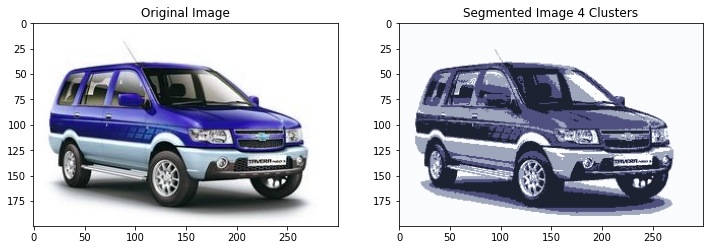

In [22]:
size = 300

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img2)
plt.subplot(122)
plt.title("Segmented Image 4 Clusters");
plt.imshow(res2, cmap='jet');#, cmap='jet'

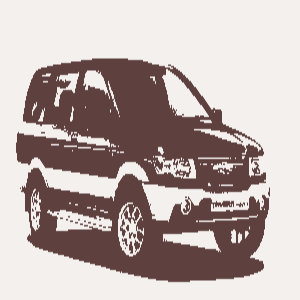

In [23]:
k =2
attempts =10
ret,label,center=cv2.kmeans(img3,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
#convert center which were float32 to unsigned int8 so we can plot it
center = np.uint8(center)
res = center[label.flatten()]
#reshape into original image
res2 = res.reshape((img2.shape))
size = 300
dsize = (size, size)
# resize image
output = cv2.resize(res2, dsize)
cv2_imshow(output)

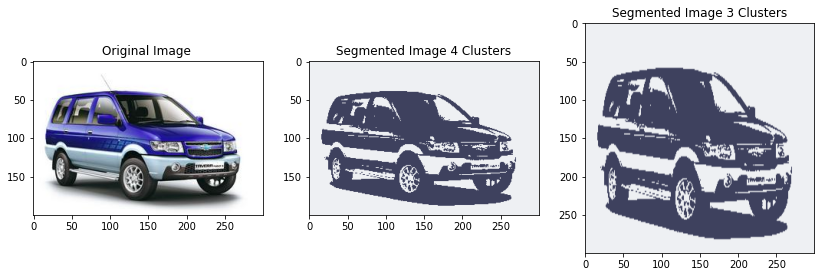

In [24]:
plt.figure(figsize=(14,14))
plt.subplot(131)
plt.title("Original Image ")
plt.imshow(img2,cmap='jet')
plt.subplot(132)
plt.title("Segmented Image 4 Clusters");
plt.imshow(res2,cmap='jet')#, cmap='jet'
plt.subplot(133)
plt.title("Segmented Image 3 Clusters");

plt.imshow(output)#, cmap='jet'


### Using AIC and BIC to Estimate Clusters in a Model.
Use AIC (Akaike information criterion) or BIC (Bayesian Information Criteria) to estimate how many clusters to use. Helpful for picking the right number of parameters if we don't know. Both estimate a quality of a model using penalty terms for a number of parameters. AIC and BIC provide optimal value for a number of parameters.

In [25]:
from sklearn.mixture import GaussianMixture as GMM

In [26]:
# res2 = res.reshape((img2.shape))
# size = 300
# dsize = (size, size)
# # resize image
# output = cv2.resize(res2, dsize)
# cv2_imshow(output)


img3 = cv2.imread('/content/drive/MyDrive/datasets/test_images_air_bike_car/car/test_2.jpg')
img4 = img3.reshape((-1, 3))

original_shape = img3.shape

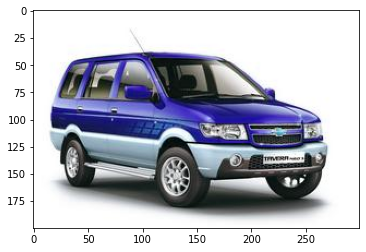

In [27]:
plt.imshow(img3)

In [28]:
#define the model and fit model to data
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img4)

#make a prediciton on the data
gmm_labels = gmm_model.predict(img4)
#put the number back into the original shape. Reconstruct the image into the orginal shape
segmented = gmm_labels.reshape(original_shape[0],original_shape[1])

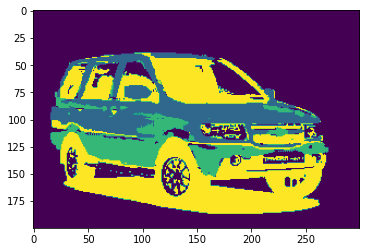

In [29]:

plt.imshow(segmented)

In [37]:

n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img4) for n in n_components]
gmm_labels = gmm_model.predict(img4)

segmented1 = gmm_labels.reshape(original_shape[0],original_shape[1])

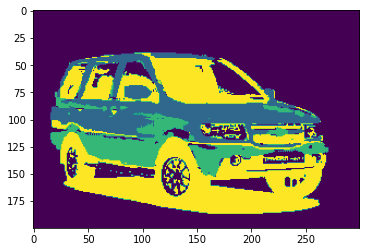

In [38]:
plt.imshow(segmented1)

For n=1 the penalty is pretty high. But for n=2 the penalty starts to drop gradually. n=4 looks pretty good.

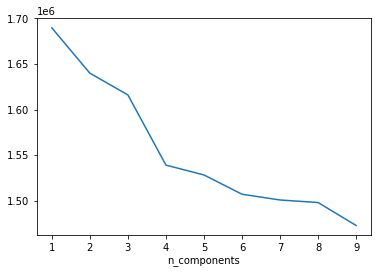

In [36]:
plt.plot(n_components, [m.bic(img4) for m in gmm_models], label='BIC')
plt.xlabel('n_components');

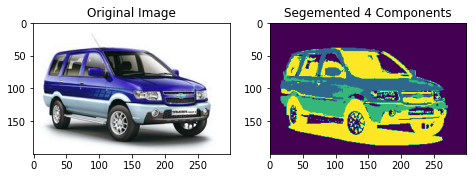

In [35]:
plt.figure(figsize=(12,12))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(img3)

#plt.imshow(segmented)

plt.subplot(132)
plt.title('Segemented 4 Components')
plt.imshow(segmented1);